# Workbook 6.1 - Standardisation and Clustering Exercises

Use the following cell to import the pandas and numpy modules:

In [5]:
import pandas as pd
import numpy as np
import statistics as st

**1.**

a) Import the file 'tremor_data.csv'.

b) Display the first few rows.

c) Set the time column as the index and store as a new dataframe.

d) Sort the data by the size of the earthquakes, largest to smallest.

e) Display the first few rows of the new dataframe.

In [6]:
# 1a
df = pd.read_csv('tremor_data.csv')

In [7]:
# 1b
df.head()

,Time (mins),Distance (m),Size (Moment Magnitude)
0,14963,20518,3.0
1,15229,35321,1.8
2,17442,38120,1.9
3,17902,51661,2.0
4,18393,36197,1.7


In [8]:
# 1c
df2 = df.set_index('Time (mins)')
df2.head()

,Distance (m),Size (Moment Magnitude)
Time (mins),,
14963,20518,3.0
15229,35321,1.8
17442,38120,1.9
17902,51661,2.0
18393,36197,1.7


In [10]:
# 1d
df_sorted = df2.sort_values('Size (Moment Magnitude)',ascending=False)

In [11]:
# 1e
df_sorted.head()

,Distance (m),Size (Moment Magnitude)
Time (mins),,
42834,53373,3.2
37059,69421,3.1
14963,20518,3.0
20679,6520,2.9
21641,21397,2.9


**2.**

Returning to the original dataframe, create new columns containing standardised versions of each of the variables and add these to the dataframe.

Save this dataframe as 'new_tremor_data.csv'.

In [23]:
# standardised data z = (x-mean)/stdev
# loop through the numbers in each column, calculate the z, store to new series, append to the dataframe
for col in [1,2,3]:
    sd = []
    for x in df.iloc[:,col]:
        z = (x-st.mean(df.iloc[:,col])/np.std(df.iloc[:,col]))
        sd.append(z)
    df[str(col)] = pd.Series(sd)
df.rename(columns={'1':'sd_time','2':'sd_dist','3':'sd_size'},inplace=True)
df.to_csv('new_tremor_data.csv')

In [24]:
df.head()

,Time (mins),Distance (m),Size (Moment Magnitude),sd_time,sd_dist,sd_size
0,14963,20518,3.0,20515.622018,-3.43791,20513.244196
1,15229,35321,1.8,35318.622018,-4.63791,35316.244196
2,17442,38120,1.9,38117.622018,-4.53791,38115.244196
3,17902,51661,2.0,51658.622018,-4.43791,51656.244196
4,18393,36197,1.7,36194.622018,-4.73791,36192.244196


## Clustering

The remainder of these exercises involve performing various cluster analysis on the tremors data, using all three dimensions: time, distance and magnitude.

### k-means clustering

In [114]:
# Import the following packages:

import numpy as np
import sklearn.cluster as sklc

# Let's put some example data in.
# Note that the points have to be ROWS:

my_data = np.array([[3,4,1],
                    [2,8,8],
                    [2,7,8],
                    [3,2,2],
                    [1,9,7],
                    [4,3,3],
                    [3,9,8],
                    [3,8,8],
                    [3,3,3],
                    [15,14,0],
                    [1,7,8],
                    [16,14,1],
                    [5,4,3],
                    [14,15,0]])

# The next line performs the clustering.
# Note that you can choose the number of clusters (n_clusters) and the number of repetitions of the algorithm (n_init).
# The output (stored to kmeans_output here) is a special object which contains all the information about the clustering.
kmeans_output = sklc.KMeans(n_clusters=3, n_init=1).fit(my_data)

# These next lines give you:

# A list giving the final cluster number of each point:
clustering_ids_kmeans = kmeans_output.labels_

# The SSE of the clustering:
clustering_sse        = kmeans_output.inertia_

# A list of the centroids, ordered by cluster number:
clustering_centroids  = kmeans_output.cluster_centers_

print(clustering_ids_kmeans)
print(clustering_sse)
print(clustering_centroids)

[2 1 1 2 1 2 1 1 2 0 1 0 2 0]
21.3666666667
[[ 15.          14.33333333   0.33333333]
 [  2.           8.           7.83333333]
 [  3.6          3.2          2.4       ]]


### hierarchical agglomerative clustering

In [115]:
# Import the following packages:

import numpy as np
import scipy.cluster.hierarchy as spch

# Let's put some example data in.
# Note that the points have to be ROWS:

my_data = np.array([[3,4,1],
                    [2,8,8],
                    [2,7,8],
                    [3,2,2],
                    [1,9,7],
                    [4,3,3],
                    [3,9,8],
                    [3,8,8],
                    [3,3,3],
                    [15,14,0],
                    [1,7,8],
                    [16,14,1],
                    [5,4,3],
                    [14,15,0]])

# Set the radius:
r = 3

# The next line performs the clustering.
# "criterion='distance'" and "method='single'" just ensure that the method is as shown in the lecture. 
# The output is just the cluster_ids this time, since hierarchical clustering does not use centroids.

clustering_ids_hierag = spch.fclusterdata(my_data, r, criterion='distance', method='single')

print(clustering_ids_hierag)

[3 2 2 3 2 3 2 2 3 1 2 1 3 1]


### Silhouette Scores

In [116]:
# Import the following package:

import sklearn.metrics as sklm

# The next lines calculate the silhouette score for each clustering.
# All that is required is the data and the the corresponding cluster ids:

silhouette_kmeans = sklm.silhouette_score(my_data,clustering_ids_kmeans)
silhouette_hierag = sklm.silhouette_score(my_data,clustering_ids_hierag)

print(silhouette_kmeans)
print(silhouette_hierag)

0.780209595029
0.780209595029


### Dendrogram

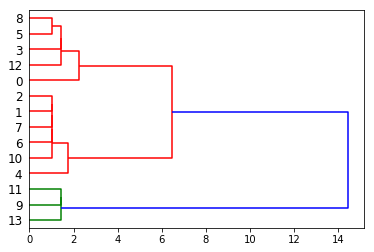

In [119]:
# Import the following packages:

import matplotlib.pyplot as plt
import sklearn.metrics as sklm
import scipy.cluster.hierarchy as spch

# The following lines create and display a dendrogram, saving it as a png:
Z = spch.linkage(my_data, method='single', metric='euclidean')
spch.dendrogram(Z,orientation='right')
plt.show()
plt.savefig('my_dendrogram.png')

**6.** Perform a k-means clustering on the full (three-dimensional), standardised tremors data.

The clustering should be repeated 20 times to ensure a good solution is found *(this can be done in the kmeans function - see above)*.

Add the cluster ids of each point to the tremors dataframe.

**7.** Perform a k-means clustering on the tremors data for k (number of clusters) ranging from 1 to 20.

Calculate the silhouette score for each clustering and store these values.

Print the optimal number of clusters based on the silhouette scores and store the cluster ids in this case.

Create a dataframe containing the results of this investigation. The index should be the number of clusters and the columns should contain the SSE and the silhouette score in each case.

**8.** Perform a hierarchical agglomerative clustering on the tremors data for r (radius) ranging over an appropriate range.

Calculate the silhouette score for each clustering and store these values.

Print the optimal value of r based on the silhouette scores and store the cluster ids in this case.

Display a dendrogram for the clustering.

**9.** Using the optimal clustering from either question 8 or 9, print summary statistics for each of the clusters (i.e. the mean, standard deviation, min and max of each variable).

*[Hint: You could add the cluster ids to the dataframe, then use Boolean indexing to create a separate dataframe for each cluster.]*

**10.** In your opinion, does hierarchical or k-means clustering provide a better model of this data?